In [1]:
import warnings
warnings.filterwarnings('ignore')

# 비지도 학습
- Target이 없는 데이터를 분류하기
- 군집화, 차원축소가 있음

# 군집 알고리즘
- 과일 데이터 사진을 보고 사과, 파인애플, 바나나로 3분류하기

In [3]:
# 과일 데이터 불러오기
import numpy as np
fruits = np.load("../Data/fruits.npy")
fruits.shape

(300, 100, 100)

> 흑백 이미지    
> 300개의 이미지가 100 X 100 픽셀로 구성    
> 그즁에 100개는 사과, 100개는 파인애플, 100개는 바나나   

In [8]:
fruits[0,0,:]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   4,   3,   2,   1,   0,   0,   0,
         0,   6,   1,   0,   4,   3,   0,   1,   8,  14,   0,   0,   4,
         8,  13,  13, 156, 191, 116,  30,   3,   0,   0,   3,   6,   2,
         1,   0,   0,   0,   0,   1,   4,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=int32)

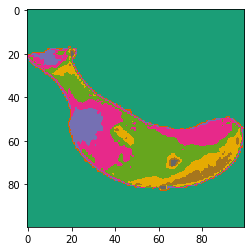

In [101]:
# 사과 이미지 보기 : 이미지로 확인하기
import matplotlib.pyplot as plt
plt.imshow(fruits[230],cmap='Dark2')
plt.show()

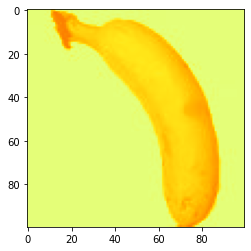

In [49]:
# 보기 편하게 변경하기

plt.imshow(fruits[220],cmap='Wistia')
plt.show()

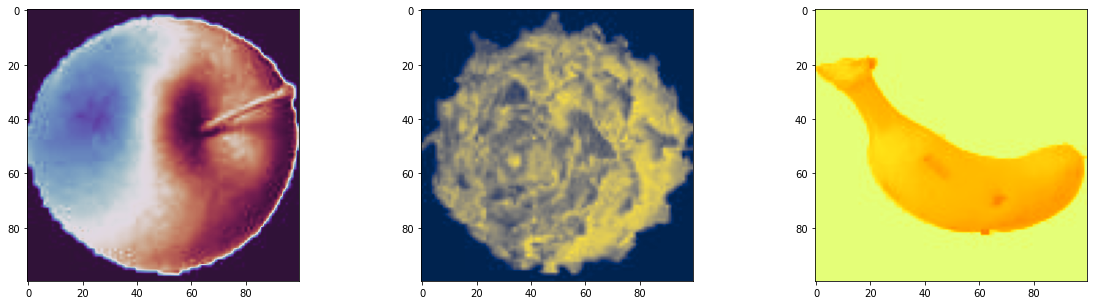

In [52]:
# 사과, 파인애플, 바나나 이미지를 나란히 보기
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(fruits[20],cmap='twilight_shifted')
axs[1].imshow(fruits[120],cmap='cividis')
axs[2].imshow(fruits[230],cmap='Wistia')
plt.show()

### 샘플 차원 변경하기
- 현재 3차원의 배열을 분석하기 위해 2차원 배열로 변경
- 배열중 page단의 수는 apple, pineapple, banana로 분류하여 변경하기

In [35]:
apple = fruits[0:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)

In [45]:
apple.shape

(100, 10000)

### 픽셀값 분석하기


In [54]:
# apple의 sample별(행별) 평균 구하기
apple.mean(axis=1)

array([ 88.4588,  98.0594,  87.4831,  98.4898,  92.9991,  82.7579,
        94.536 ,  95.7095,  90.7508,  81.7788,  87.1803,  95.2125,
        93.9517,  87.1466,  97.6411,  87.3593,  89.0571, 101.0366,
        92.8971, 101.0462, 105.0824,  88.7961,  99.6585,  97.359 ,
        94.2293,  92.2932,  95.2592,  93.4393, 103.0312,  94.7767,
        90.6388,  89.1673,  97.8923,  97.4053, 100.8732,  90.6799,
       100.3753,  85.9834,  96.5866,  97.2989,  90.8155, 102.4502,
        87.3238,  89.9929,  86.8717,  86.4904,  95.3862,  89.289 ,
        96.9175,  91.782 ,  96.2412,  99.7925,  95.1062,  87.5648,
        89.3416,  89.6668,  93.9096,  97.5639,  87.2779,  97.9526,
       103.3378,  94.5728,  83.8009,  83.6077, 102.9481,  87.1496,
        91.3842, 100.5921,  93.9603,  90.9806,  97.5707,  97.574 ,
        82.5605,  87.2897,  97.0628,  90.4258,  90.6506,  97.741 ,
        98.1869,  93.7264,  87.536 ,  84.8565,  89.2303,  86.8919,
        88.8434,  86.7783,  96.8703,  97.3682,  82.0917,  87.3

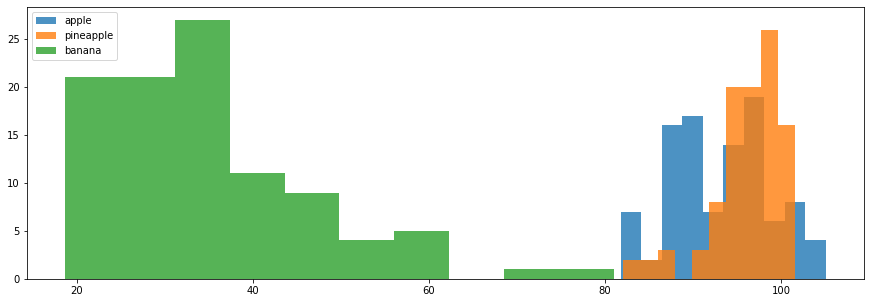

In [71]:
# 과일별(Sample별) 빈도수를 히스토그램으로 표현하기
plt.figure(figsize=(15,5))
plt.hist(np.mean(apple, axis=1),alpha=0.8)
plt.hist(np.mean(pineapple, axis=1),alpha=0.8)
plt.hist(np.mean(banana, axis=1),alpha=0.8)
plt.legend(['apple','pineapple','banana'])
plt.show()

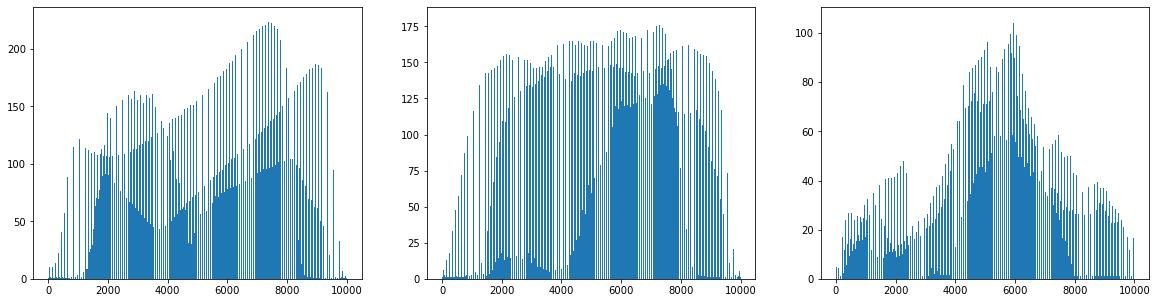

In [72]:
# Feature(픽셀별) 평균의 막대 그리기
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000),np.mean(apple, axis=0))
axs[1].bar(range(10000),np.mean(pineapple, axis=0))
axs[2].bar(range(10000),np.mean(banana, axis=0))
plt.show()

In [73]:
# 평균 이미지로 그림 표현하기 : 이미지로 그리기 위해 다시 2차원 배열로 변경한다.
apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)


In [75]:
print(apple.shape)
print(apple_mean.shape)

(100, 10000)
(100, 100)


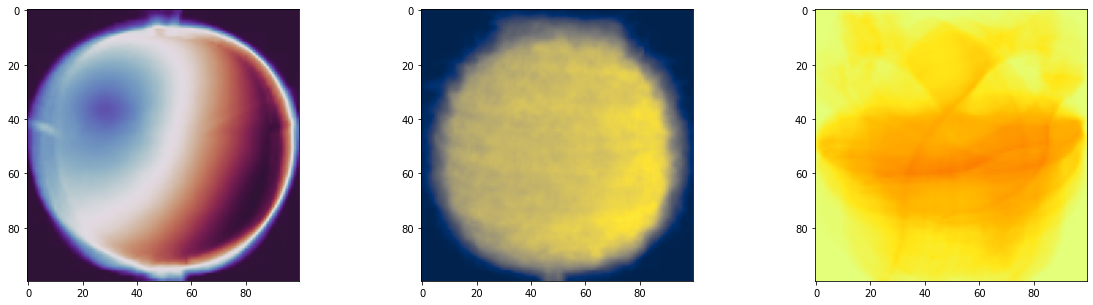

In [76]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(apple_mean,cmap='twilight_shifted')
axs[1].imshow(pineapple_mean,cmap='cividis')
axs[2].imshow(banana_mean,cmap='Wistia')
plt.show()

### 평균값과 가까운 사진 고르기
- 위에서 구한 평균 이미지와 각 샘플들의 픽셀값과 비교하여 가장 가까운 거리의 이미지는 해당 과일일 것이다.
- 사과만 잘 분류하는지 시도

In [78]:
abs_diff = np.abs(fruits - apple_mean) # 양수와 음수의 구분이 필요없으므로 절대값 사용
abs_mean = np.mean(abs_diff, axis=(1,2)) # abs_diff가 3차원이기 때문에 page차원을 제외하고 행과 열만의 평균을 구함
abs_mean.shape # 300개의 원소로 이루어진 1차원 배열

(300,)

In [79]:
abs_mean

array([17.357734, 13.554336, 17.202008, 15.769808, 18.019082, 20.55447 ,
       16.803214, 16.124154, 19.59156 , 21.365726, 16.465608, 16.603126,
       13.41592 , 17.248916, 15.977246, 15.477304, 18.571426, 16.52309 ,
       27.595128, 19.7579  , 20.823426, 16.460124, 17.103872, 15.88027 ,
       15.058592, 19.361638, 24.031656, 14.786244, 19.27237 , 20.824594,
       14.814994, 18.677796, 15.906604, 13.10645 , 18.453898, 16.616742,
       16.327252, 18.969418, 13.913228, 16.51597 , 18.388472, 19.183942,
       29.117914, 18.440636, 28.192728, 21.463068, 19.732278, 15.57259 ,
       13.11697 , 18.756192, 14.416062, 21.528646, 26.231478, 15.918032,
       18.57341 , 16.42997 , 17.080708, 13.190102, 18.24878 , 13.520802,
       20.85775 , 16.882222, 22.814864, 19.030818, 19.13427 , 16.628244,
       14.860376, 19.391788, 14.828492, 14.48473 , 13.119974, 15.92342 ,
       20.417536, 16.248422, 13.734026, 18.429454, 15.216936, 16.411588,
       13.49728 , 20.012288, 17.256706, 21.156152, 

> abs_mean과 apple의 차이가 가장 적은것으로 구분


In [80]:
# 300개의 데이터중 차이가 적은 순으로 정렬하면서 해당 이미지를 불러오기 위한 index가 필요하다 (arg.sort)
apple_index = np.argsort(abs_mean)[:100]

array([33, 48, 70, 57, 87, 12, 78, 59,  1, 74, 86, 38, 50, 92, 69, 27, 30,
       68, 66, 24, 76, 15, 98, 84, 47, 90,  3, 94, 23, 32, 53, 71, 14,  7,
       73, 36, 77, 55, 21, 10, 39, 17, 99, 11, 35, 65, 95,  6, 61, 56, 22,
       89,  2, 13, 80,  0, 97,  4, 58, 40, 75, 43, 34, 82, 16, 54, 31, 49,
       93, 37, 63, 64, 41, 28, 25, 96, 67,  8, 83, 46, 19, 79, 72,  5, 85,
       20, 29, 60, 81,  9, 45, 51, 88, 62, 91, 26, 52, 18, 44, 42])

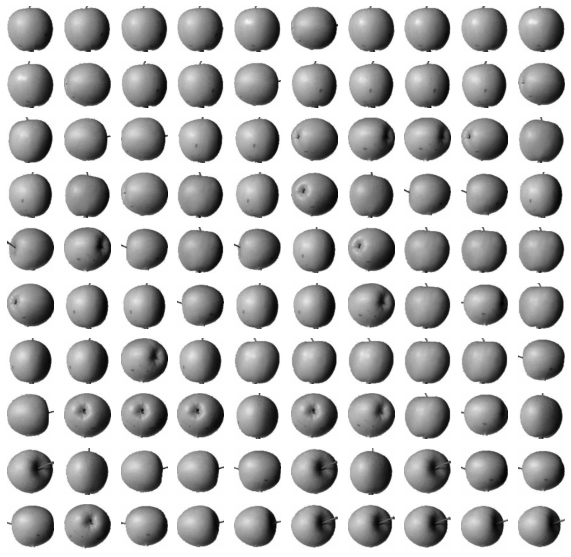

In [104]:
# 그림 그려보기
fig, axs = plt.subplots(10,10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
        axs[i,j].axis('off') # 축 안보여주기
plt.show()

> 이와 같은 방법으로 비지도학습인 군집분류 알고리즘이 구성된다.

--- 
### 바나나로 확인해보기

In [83]:
abs_diff = np.abs(fruits - banana_mean) # 양수와 음수의 구분이 필요없으므로 절대값 사용
abs_mean = np.mean(abs_diff, axis=(1,2)) # abs_diff가 3차원이기 때문에 page차원을 제외하고 행과 열만의 평균을 구함
abs_mean.shape # 300개의 원소로 이루어진 1차원 배열

(300,)

In [96]:
banana_index = np.argsort(abs_mean)[:100]
banana_index

array([285, 212, 291, 261, 208, 286, 284, 265, 219, 276, 264, 290, 283,
       252, 255, 203, 266, 200, 201, 269, 247, 256, 281, 270, 211, 254,
       268, 239, 299, 225, 250, 275, 280, 232, 246, 205, 244, 263, 297,
       224, 279, 262, 238, 288, 289, 287, 218, 245, 217, 230, 274, 295,
       209, 220, 213, 267, 237, 229, 248, 278, 204, 243, 228, 206, 207,
       272, 241, 210, 214, 233, 222, 235, 277, 253, 294, 282, 240, 271,
       296, 249, 215, 258, 259, 227, 202, 236, 293, 260, 226, 216, 292,
       257, 221, 298, 251, 223, 242, 231,   9,  88])

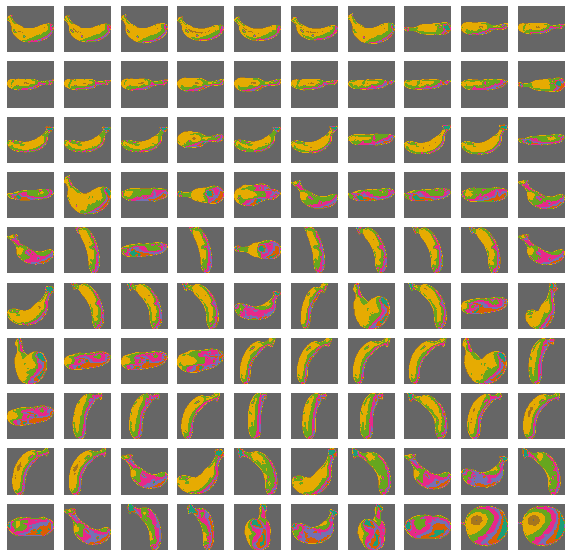

In [106]:
# 그림 그려보기
fig, axs = plt.subplots(10,10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[banana_index[i*10+j]], cmap='Dark2_r')
        axs[i,j].axis('off') # 축 안보여주기
plt.show()

---
### 파인애플 확인하기

In [97]:
abs_diff = np.abs(fruits - pineapple_mean) # 양수와 음수의 구분이 필요없으므로 절대값 사용
abs_mean = np.mean(abs_diff, axis=(1,2)) # abs_diff가 3차원이기 때문에 page차원을 제외하고 행과 열만의 평균을 구함
abs_mean.shape # 300개의 원소로 이루어진 1차원 배열

(300,)

In [98]:
pineapple_index = np.argsort(abs_mean)[:100]
pineapple_index

array([111, 164, 152, 136, 137, 129, 166, 165, 101, 174, 182, 150, 192,
       148, 117, 140, 100, 193, 184, 181, 162, 175, 191, 120, 154, 155,
       157, 145, 186, 121, 103, 161, 122, 138, 118, 176, 160, 127, 156,
       144, 158, 105, 104, 188, 102, 124, 198, 177, 112, 185, 133, 125,
       131, 180, 109, 115, 110, 149, 106, 187, 163, 170, 141, 159, 183,
       142, 128, 195, 147, 167, 119, 189, 190, 151, 135, 169, 123, 171,
       143, 168, 107, 108, 113, 197, 130, 139, 116, 134, 199, 172, 179,
        77, 146, 178, 114, 194, 196, 173,  32,  46])

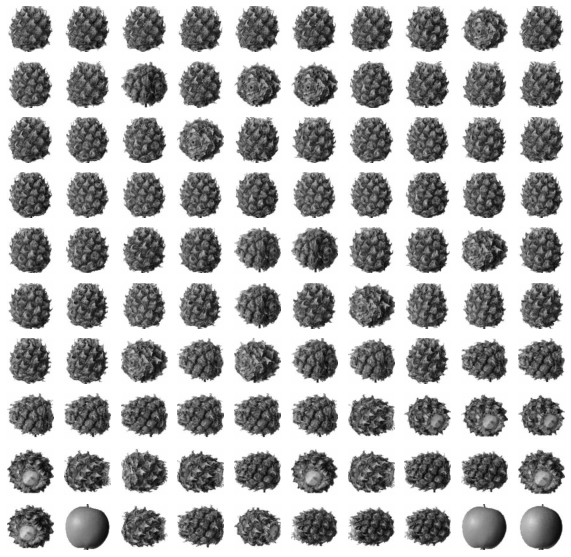

In [99]:
# 그림 그려보기
fig, axs = plt.subplots(10,10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[pineapple_index[i*10+j]], cmap='gray_r')
        axs[i,j].axis('off') # 축 안보여주기
plt.show()